In [1]:
# import library yang akan digunakan disini ada library pandas untuk manipulasi data lalu ada library numpy untuk
# mengubah data menjadi bentuk array.

import pandas as pd 
import numpy as np

In [5]:
# Untuk membaca data csv yang digunakan dan melihat 10 sampel data secara acak.

data = pd.read_csv('iris_dataset.csv')
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
107,7.3,2.9,6.3,1.8,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
28,5.2,3.4,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa


In [6]:
data.info() # Untuk melihat info dari data yang sudah di load.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Label          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.loc[data['SepalLengthCm'].isnull()] # Untuk melihat apakah atribut SepalLengthCm memiliki data null atau tidak

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label


In [8]:
data.loc[data['SepalWidthCm'].isnull()] # Untuk melihat apakah atribut SepalWidthCm memiliki data null atau tidak

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label


In [9]:
data.loc[data['PetalLengthCm'].isnull()] # Untuk melihat apakah atribut PetalLengthCm memiliki data null atau tidak

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label


In [10]:
data.loc[data['PetalWidthCm'].isnull()] # Untuk melihat apakah atribut PetalWidthCm memiliki data null atau tidak

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label


In [11]:
data.groupby('Label').count() # Untuk melihat banyak data berdasarkan label

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Label,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [12]:
# Untuk membagi data yang akan digunakan sebagai pembelajaran mesin dan melihat 5 data teratas

x_data = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
x_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Untuk membagi data menjadi data target sebagai output dan melihat 5 data teratas

y_target = data['Label'] 
y_target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Label, dtype: object

In [14]:
# Untuk membagi data menjadi data train dan data test dengan sebaran data 70% train dan 30% test dengan rundom 
# state atau frekuensi ke acakan data sebanyak 123

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_target, test_size=0.33, random_state=123
)

In [15]:
from sklearn.metrics import accuracy_score # Import library untuk menghitung akurasi

In [16]:
from sklearn import tree # Import library Decision Tree 

DecisionTree = tree.DecisionTreeClassifier() # Membuat model Decision Tree 
DecisionTree.fit(X_train, y_train) # Melakukan train model Decision Tree 

DecisionTreeClassifier()

In [17]:
y_pred = DecisionTree.predict(X_test) # Melakukan testing pada model Decision Tree yang sudah di train
treeAccuracy = accuracy_score(y_pred, y_test) # Menghitung akurasi testing
print(treeAccuracy) # Print akurasi

0.96


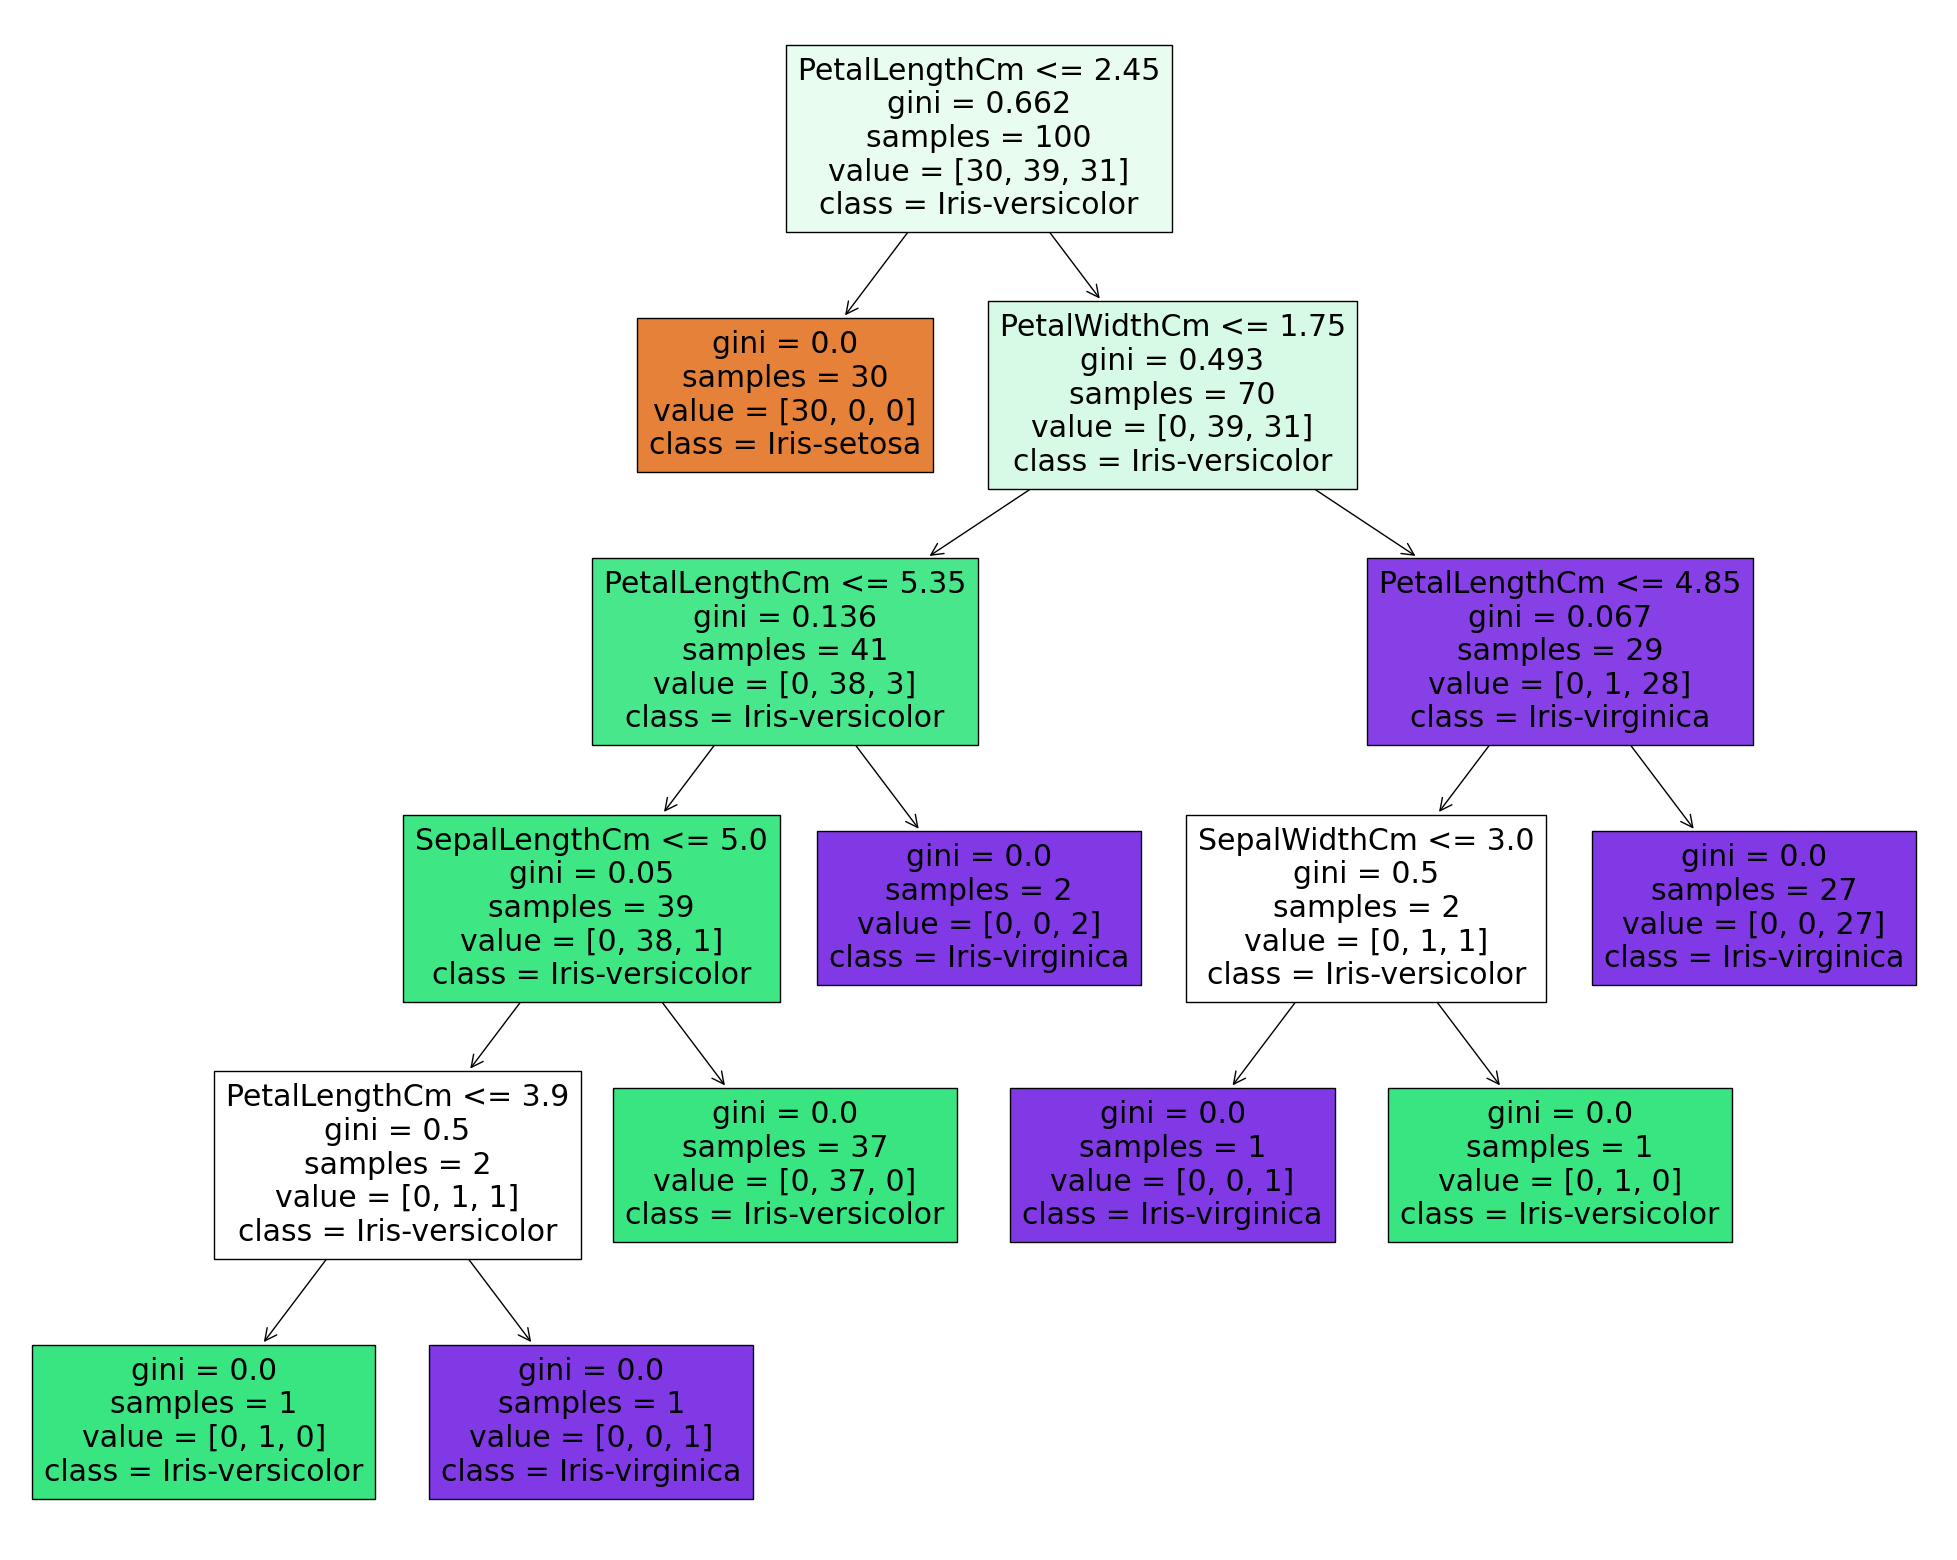

In [18]:
from matplotlib import pyplot as plt # Import library untuk plot

# Membuat plot dari model Decision Tree 
fig, ax = plt.subplots(figsize=(25, 20))
_ = tree.plot_tree(DecisionTree, 
                   feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                   class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   filled=True,
                   ax=ax)
plt.show() # Menampilkan plot yang sudah dibuat

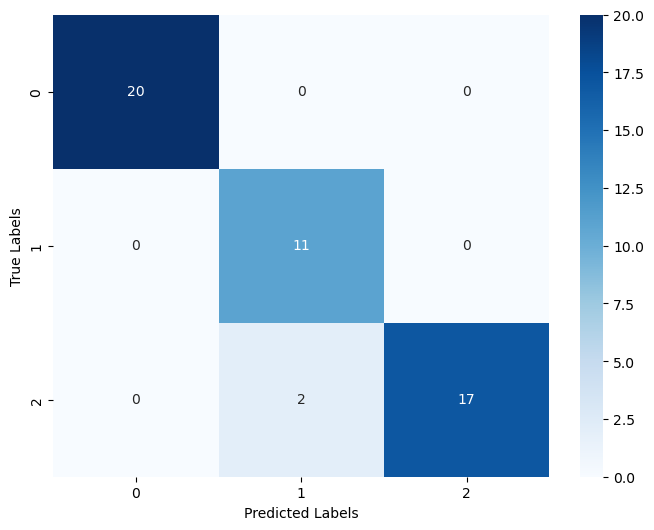

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import library untuk menampilkan Confucion Matrix
import seaborn as sns # Import library visualisasi untuk Confucion Matrix

# Mengitung Confucion Matrix dari hasil testing
y_pred = DecisionTree.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confucion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()